# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv('Data/spam-train.txt',header=None)
data_test = pd.read_csv('Data/spam-test.txt',header=None)

In [3]:
data_train_eval = pd.DataFrame(data_train[57].copy())
data_test_eval = pd.DataFrame(data_test[57].copy())

In [4]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.0,0.00,0.00,0.0,1.01,0.0,0.0,0.0,0.00,0.00,...,0.000,0.088,0.000,0.000,0.088,0.000,6.718,33.0,215.0,1.0
1,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,...,0.098,0.589,0.000,0.000,0.000,0.000,2.044,22.0,92.0,1.0
2,0.0,0.53,0.00,0.0,1.06,0.0,1.6,0.0,0.00,0.53,...,0.000,0.239,0.079,0.159,0.000,0.000,4.555,51.0,123.0,1.0
3,0.0,0.00,0.23,0.0,0.92,0.0,0.0,0.0,0.23,0.00,...,0.000,0.130,0.026,0.026,0.000,0.026,2.222,23.0,480.0,0.0
4,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.428,4.0,10.0,0.0


### Useful Functions

In [5]:
def sigmoid(r):
    return 1/(1+np.exp(-r))

### Generage Design Matricies

In [6]:
def design_matrices(df_train,df_test,reg=None):
    # reg: 'stand', 'log', 'bin'

    X_train = np.array(df_train.drop(57,axis=1))
    X_test = np.array(df_test.drop(57,axis=1))
    y_train = np.array(df_train[57].values.reshape(len(df_train),1))
    y_test = np.array(df_test[57].values.reshape(len(df_test),1))
    
    if reg == 'stand':
        X_train = pd.DataFrame(X_train)
        X_test = pd.DataFrame(X_test)

        for col in X_train:
            mean = np.mean(X_train[col])
            std = np.std(X_train[col])
            X_train[col] = (X_train[col] - mean)/std
            X_test[col] = (X_test[col] - mean)/std
    
    elif reg == 'log':
        X_train = pd.DataFrame(X_train)
        X_test = pd.DataFrame(X_test)

        for col in X_train:
            X_train[col] = np.log(X_train[col] + 0.1)
            X_test[col] = np.log(X_test[col] + 0.1)

    elif reg == 'bin':
        X_train = pd.DataFrame(X_train)
        X_test = pd.DataFrame(X_test)

        def binarize(val):
            if val > 0:
                return 1
            else:
                return 0
            
        for col in X_train:
            X_train[col] =  X_train[col].apply(lambda row: binarize(row))
            X_test[col] = X_test[col].apply(lambda row: binarize(row))
            
    # Add intercept column
    X_train = np.concatenate((X_train,np.mat(np.ones(len(X_train))).T),axis=1)
    X_test = np.concatenate((X_test,np.mat(np.ones(len(X_test))).T),axis=1)

    return X_train, y_train, X_test, y_test

## Logistic Regression - Gradient Descent 

In [7]:
# Loss Function
def compute_loss_logistic(X, y, w): 
    return -np.asscalar(y.T @ np.log(sigmoid(X@w)) + (1-y).T @ np.log(1-sigmoid(X@w)+1e-33))

In [8]:
# Gradient Descent Algorithm
def logistic_regression(X, y, alpha, converge_thresh, ret_lossHistory=False):
    w = np.random.normal(size=(X.shape[1],1))       # initial guess
    loss_history = [compute_loss_logistic(X,y,w)]   # Keep track of loss over iterations to ensure it decreasing
    loss_dif = loss_history[0]
    iteration = 0
    
    while loss_dif > converge_thresh:
        w = w + alpha * (X.T @ (y - sigmoid(X@w)))
        loss_history.append(compute_loss_logistic(X,y,w))
        loss_dif = loss_history[iteration] - loss_history[iteration+1]
        iteration += 1
        
    if ret_lossHistory:
        return w, loss_history
    else:
        return w

In [9]:
def predict(X,w):
    preds = []
    for prob in sigmoid(X@w):
        if prob >= 0.50:
            preds.append(1)
        else:
            preds.append(0)
    return preds

In [10]:
def prob(X,w):
    return sigmoid(X@w)

### Standard Normalization

In [11]:
X_train_stand, y_train_stand, X_test_stand, y_test_stand = design_matrices(data_train,data_test,reg='stand')

In [12]:
w_stand, loss_history_stand = logistic_regression(X_train_stand,y_train_stand,1e-4,1e-4,ret_lossHistory=True)

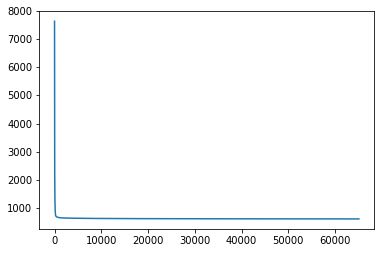

In [13]:
plt.plot(np.linspace(0,len(loss_history_stand),len(loss_history_stand)),loss_history_stand)

In [14]:
data_test_eval['stand_pred'] = predict(X_test_stand,w_stand)
data_train_eval['stand_pred'] = predict(X_train_stand,w_stand)

### Log Normalization

In [15]:
X_train_log, y_train_log, X_test_log, y_test_log = design_matrices(data_train,data_test,reg='log')

In [16]:
w_log, loss_history_log = logistic_regression(X_train_log,y_train_log,1e-5,1e-4,ret_lossHistory=True)

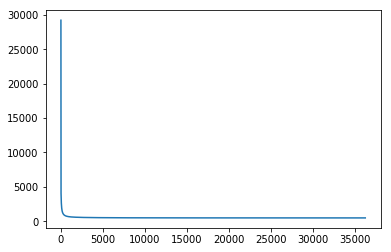

In [17]:
plt.plot(np.linspace(0,len(loss_history_log),len(loss_history_log)),loss_history_log)

In [18]:
data_test_eval['log_pred'] = predict(X_test_log,w_log)
data_train_eval['log_pred'] = predict(X_train_log,w_log)

### Binary Normalization

In [19]:
X_train_bin, y_train_bin, X_test_bin, y_test_bin = design_matrices(data_train,data_test,reg='bin')

In [20]:
w_bin, loss_history_bin = logistic_regression(X_train_bin,y_train_bin,1e-4,1e-4,ret_lossHistory=True)

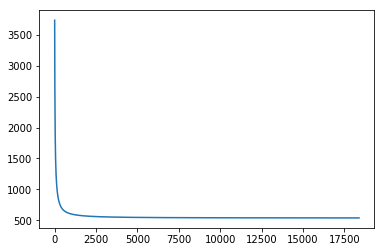

In [21]:
plt.plot(np.linspace(0,len(loss_history_bin),len(loss_history_bin)),loss_history_bin)

In [22]:
data_test_eval['bin_pred'] = predict(X_test_bin,w_bin)
data_train_eval['bin_pred'] = predict(X_train_bin,w_bin)

## Normalization Comparison

In [23]:
def evaluate_model(train,test,stand):
    # return {model: [train error, test error, combined error]
    train_error = 1 - len(train[train.apply(lambda row: row[57]==row[stand+'_pred'],axis=1)])/len(train)
    test_error = 1 - len(test[test.apply(lambda row: row[57]==row[stand+'_pred'],axis=1)])/len(test)
    
    combined = pd.concat((train,test))
    combined_error = 1 -len(combined[combined.apply(lambda row: row[57]==row[stand+'_pred'],axis=1)])/len(combined)
    return [stand, train_error, test_error, combined_error]

In [24]:
stand_eval = evaluate_model(data_train_eval,data_test_eval,'stand')
log_eval = evaluate_model(data_train_eval,data_test_eval,'log')
bin_eval = evaluate_model(data_train_eval,data_test_eval,'bin')

errors = pd.DataFrame([stand_eval,log_eval,bin_eval],columns=['Normalization','Train','Test','Combined'])
errors = errors.set_index('Normalization')

In [25]:
print('Error rates of different standardization methods:')
errors

Error rates of different standardization methods:


,Train,Test,Combined
Normalization,,,
stand,0.066884,0.063802,0.065855
log,0.052529,0.054036,0.053032
bin,0.064274,0.066406,0.064986
